Import allnecessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv("abalone.csv")

In [3]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df=pd.DataFrame(ds)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
df['Sex']=le.fit_transform(df['Sex'])

encode categorial data into numerical data

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.shape

(4177, 9)

data have 4177 rows and 9  columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [12]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

some variables are int type and some are float type

In [13]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

data have no null values

In [14]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

<AxesSubplot:>

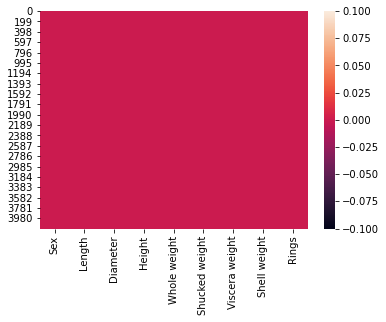

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

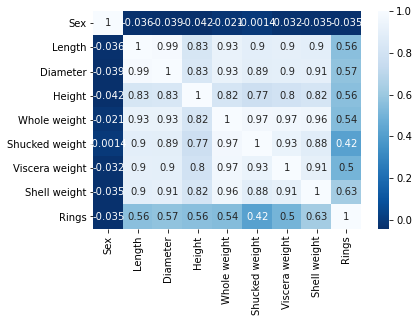

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')

above heatmap shows the corelation between input variables andtarget variable

In [18]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


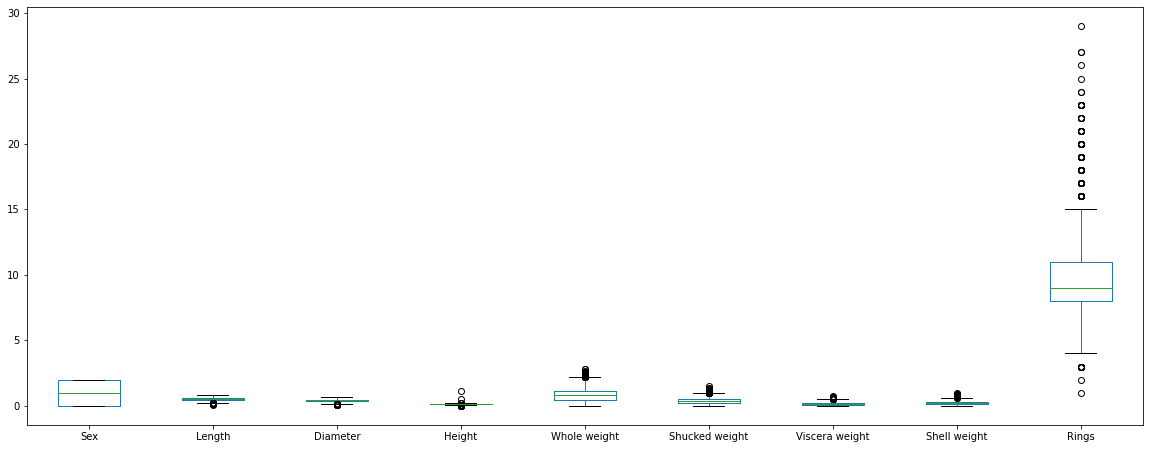

In [19]:
df.plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.30)
plt.show()

above box plot shows the outlers present in data

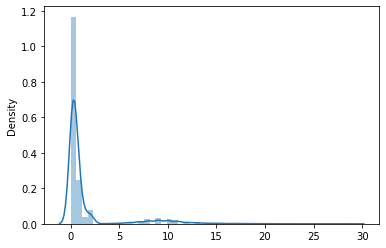

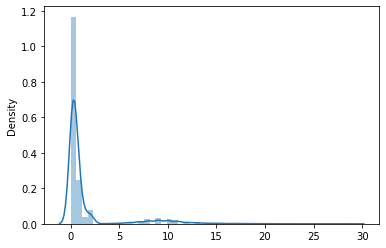

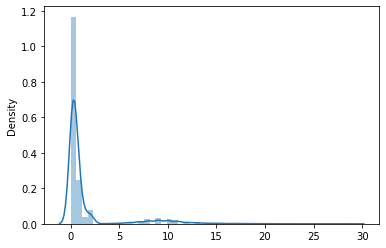

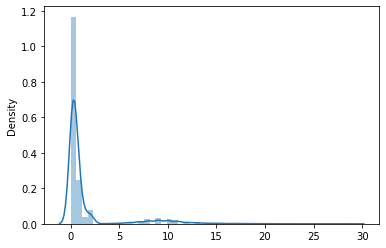

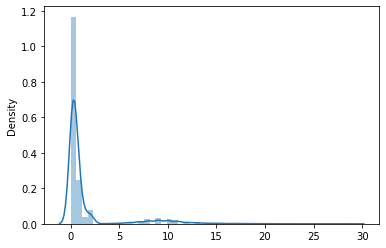

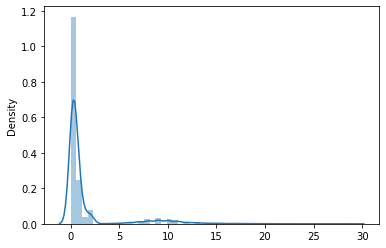

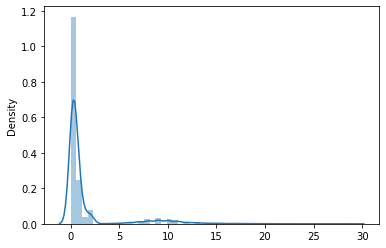

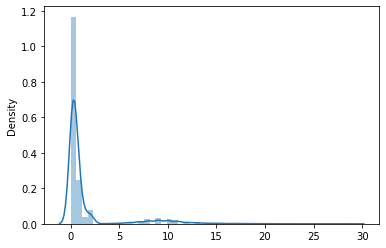

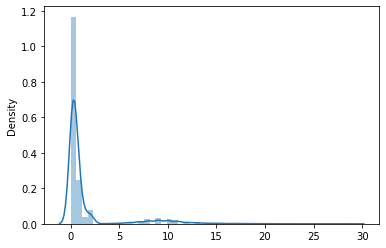

In [20]:
for i in df.columns:
    plt.figure()
    sns.distplot(df)

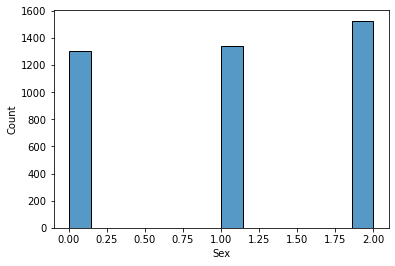

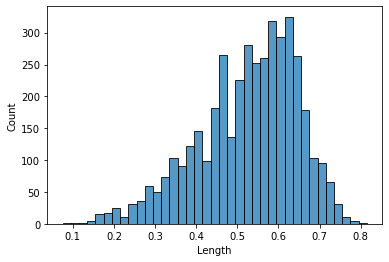

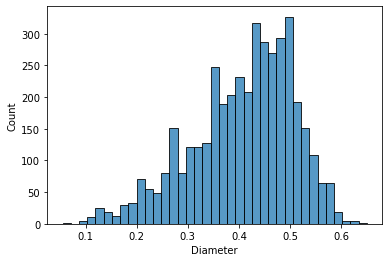

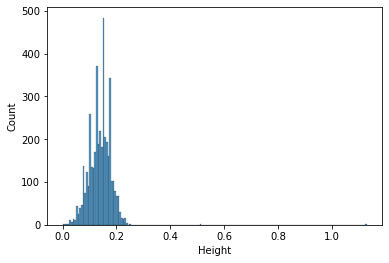

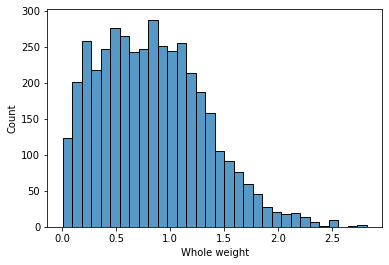

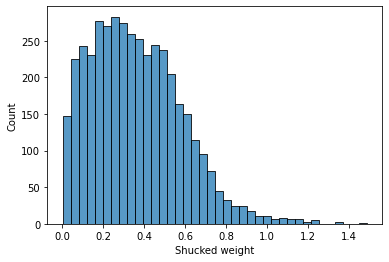

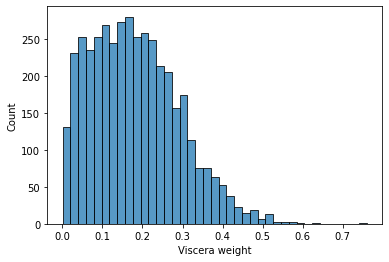

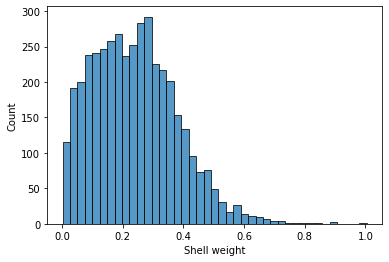

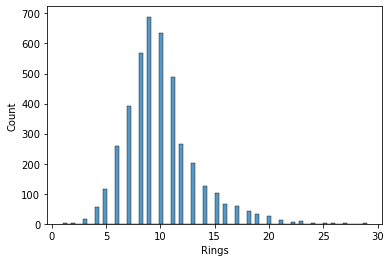

In [21]:
for i in df.columns:
    plt.figure()
    sns.histplot(df[i])

<AxesSubplot:xlabel='Rings', ylabel='Length'>

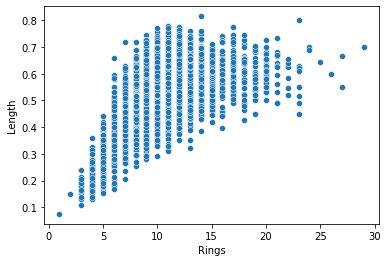

In [22]:
sns.scatterplot(df['Rings'],df['Length'])

<AxesSubplot:xlabel='Rings', ylabel='Height'>

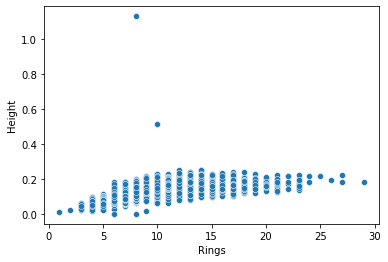

In [23]:
sns.scatterplot(df['Rings'],df['Height'])

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

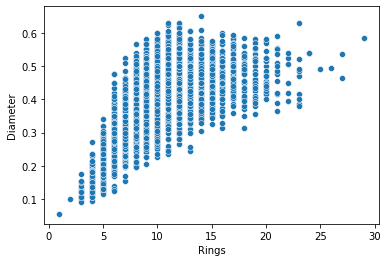

In [24]:
sns.scatterplot(df['Rings'],df['Diameter'])

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

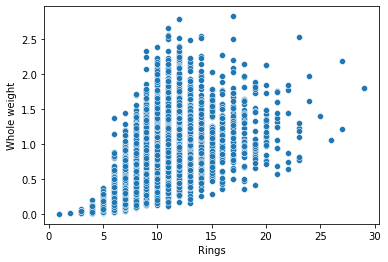

In [25]:
sns.scatterplot(df['Rings'],df['Whole weight'])

<AxesSubplot:xlabel='Rings', ylabel='Shucked weight'>

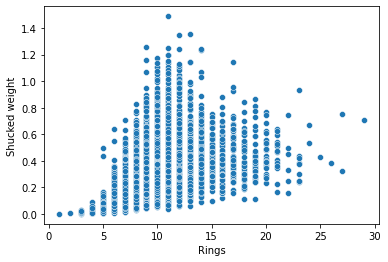

In [26]:
sns.scatterplot(df['Rings'],df['Shucked weight'])

<AxesSubplot:xlabel='Rings', ylabel='Viscera weight'>

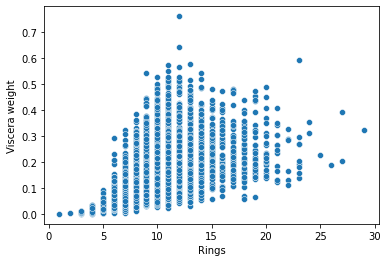

In [27]:
sns.scatterplot(df['Rings'],df['Viscera weight'])

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

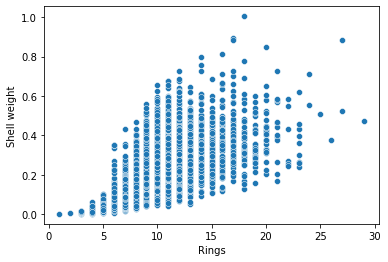

In [28]:
sns.scatterplot(df['Rings'],df['Shell weight'])

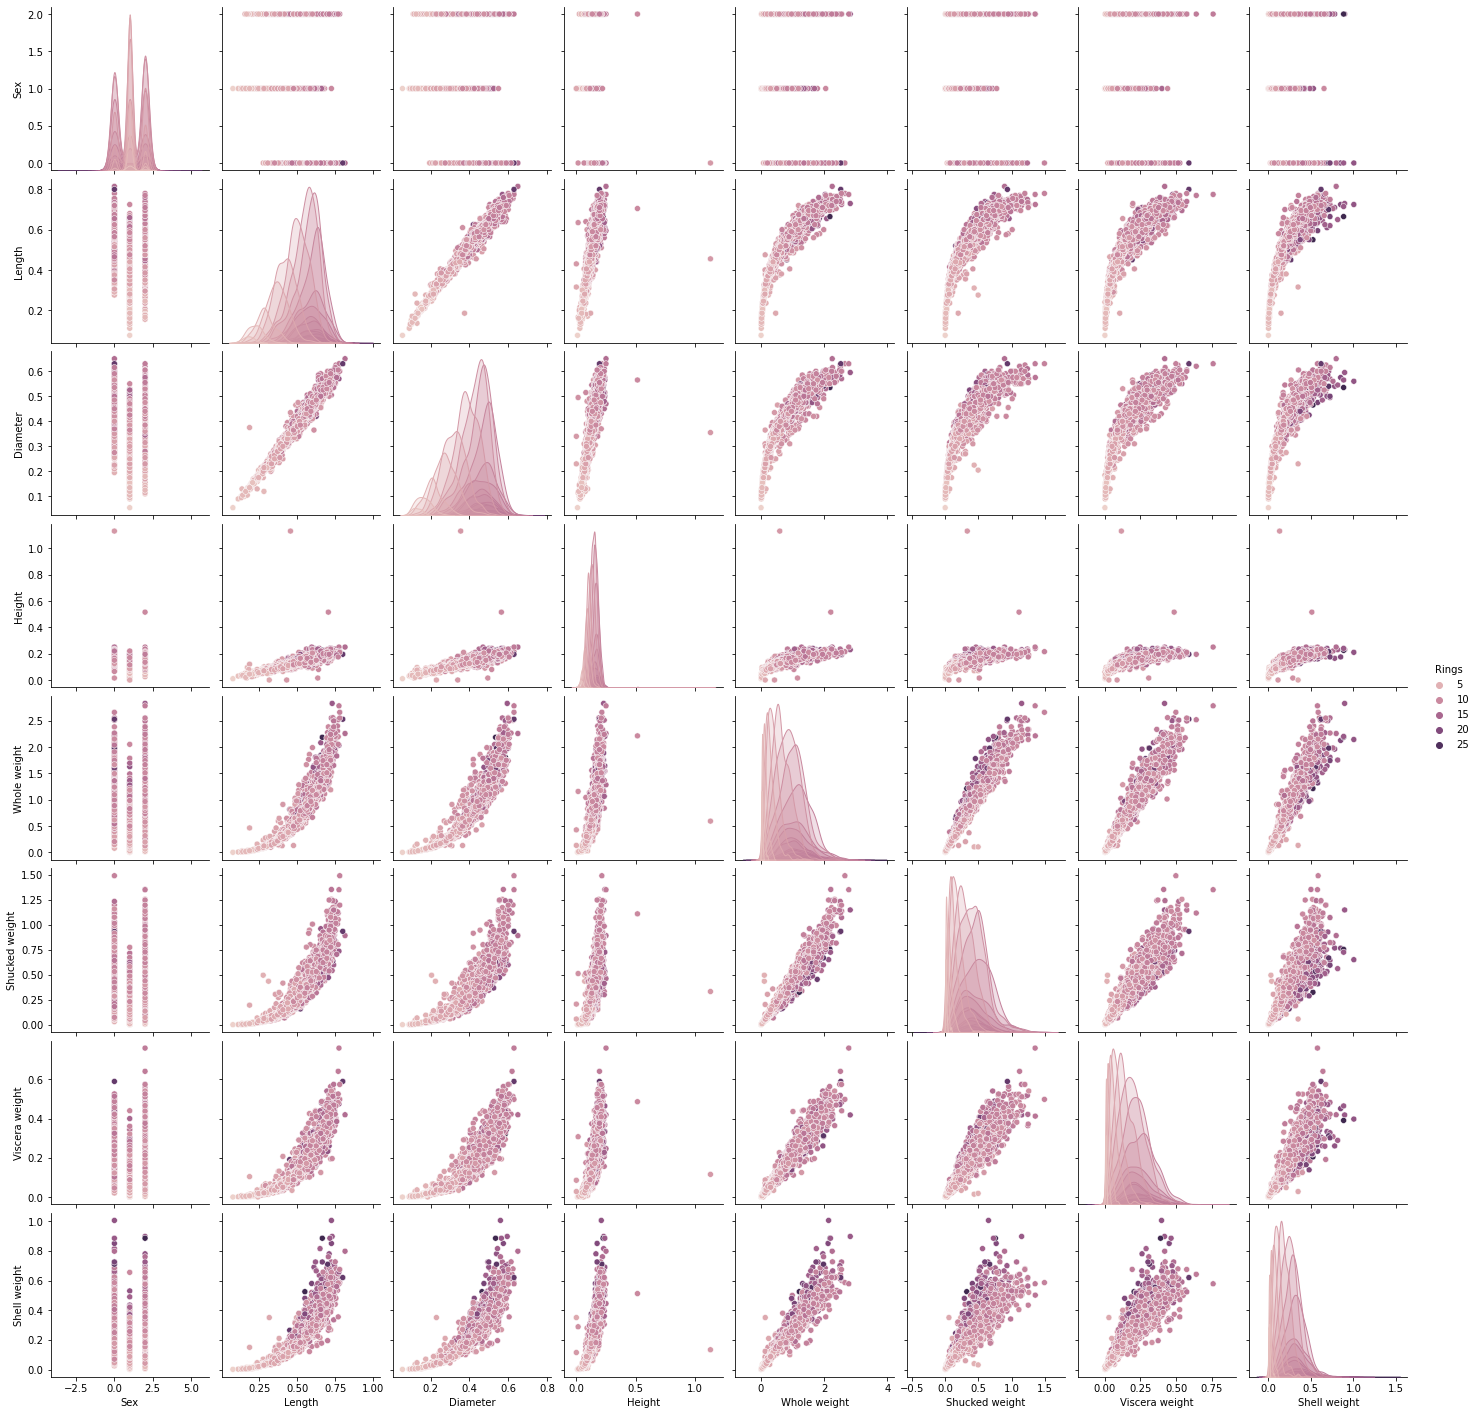

In [29]:
sns.pairplot(df,hue='Rings')

In [30]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [31]:
z=np.abs(zscore(df))

In [32]:
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [33]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [34]:
df_new=df[(z<3).all(axis=1)]

remove the outliers

In [35]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [36]:
df_new.shape

(4027, 9)

In [37]:
df.shape

(4177, 9)

In [87]:
df_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.026621
dtype: float64

skewness is reduced as we removed outliers

In [40]:
def AGE (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings'] >=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0


df_new['Age']=df_new.apply (lambda row: AGE(row),axis=1)

In [41]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [42]:
df_new.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.033272,-0.036979
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074,0.570022
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978,0.586567
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540,0.604857
Whole weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295,0.573734
Shucked weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424,0.486689
Viscera weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917,0.557398
Shell weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872,0.628839
Rings,-0.033272,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000,0.860578
Age,-0.036979,0.570022,0.586567,0.604857,0.573734,0.486689,0.557398,0.628839,0.860578,1.000000


In [43]:
df_new.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763,1.985597
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691,0.821223
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000,1.000000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000,1.000000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000,2.000000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000,3.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000,3.000000


<AxesSubplot:>

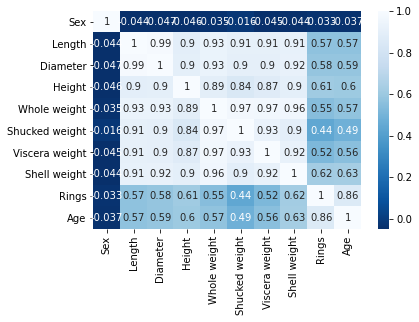

In [45]:
sns.heatmap(df_new.corr(),annot=True,cmap="Blues_r")

In [46]:
x=df_new.iloc[:,:-1]

In [47]:
y=df_new.iloc[:,-1]

In [48]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
y.head()

0    3
1    1
2    2
3    2
4    1
Name: Age, dtype: int64

In [50]:
x.drop('Rings',inplace=True,axis=1)

split data for training and testing

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [52]:
x_train.shape

(3020, 8)

In [53]:
y_train.shape

(3020,)

In [54]:
y_test.shape

(1007,)

In [55]:
x_test.shape

(1007, 8)

passed the data to different classification algorithmns to predict the values

In [56]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lpred=lg.predict(x_test)
print(accuracy_score(y_test,lpred))

0.6295928500496525


In [57]:
print(confusion_matrix(y_test,lpred))

[[267  57  15]
 [ 77 153  93]
 [ 48  83 214]]


In [58]:
print(classification_report(y_test,lpred))

              precision    recall  f1-score   support

           1       0.68      0.79      0.73       339
           2       0.52      0.47      0.50       323
           3       0.66      0.62      0.64       345

    accuracy                           0.63      1007
   macro avg       0.62      0.63      0.62      1007
weighted avg       0.62      0.63      0.63      1007



In [60]:
sv=SVC()
sv.fit(x_train,y_train)
spred=sv.predict(x_test)
print(accuracy_score(y_test,spred))
print(classification_report(y_test,spred))
print(confusion_matrix(y_test,spred))

0.6146971201588878
              precision    recall  f1-score   support

           1       0.74      0.71      0.72       339
           2       0.47      0.57      0.52       323
           3       0.67      0.56      0.61       345

    accuracy                           0.61      1007
   macro avg       0.63      0.61      0.62      1007
weighted avg       0.63      0.61      0.62      1007

[[241  86  12]
 [ 54 184  85]
 [ 31 120 194]]


In [61]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
kpred=knn.predict(x_test)
print(accuracy_score(y_test,kpred))
print(classification_report(y_test,kpred))
print(confusion_matrix(y_test,kpred))

0.5908639523336644
              precision    recall  f1-score   support

           1       0.68      0.73      0.71       339
           2       0.44      0.49      0.46       323
           3       0.66      0.55      0.60       345

    accuracy                           0.59      1007
   macro avg       0.59      0.59      0.59      1007
weighted avg       0.60      0.59      0.59      1007

[[249  77  13]
 [ 80 157  86]
 [ 37 119 189]]


In [62]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mpred=mnb.predict(x_test)
print(accuracy_score(y_test,mpred))
print(classification_report(y_test,mpred))
print(confusion_matrix(y_test,mpred))

0.4955312810327706
              precision    recall  f1-score   support

           1       0.51      0.81      0.63       339
           2       0.42      0.16      0.24       323
           3       0.50      0.50      0.50       345

    accuracy                           0.50      1007
   macro avg       0.48      0.49      0.45      1007
weighted avg       0.48      0.50      0.46      1007

[[275  21  43]
 [140  53 130]
 [121  53 171]]


In [63]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dpred=dtc.predict(x_test)
print(accuracy_score(y_test,dpred))
print(classification_report(y_test,dpred))
print(confusion_matrix(y_test,dpred))

0.5461767626613704
              precision    recall  f1-score   support

           1       0.65      0.64      0.64       339
           2       0.42      0.48      0.44       323
           3       0.59      0.52      0.55       345

    accuracy                           0.55      1007
   macro avg       0.55      0.55      0.55      1007
weighted avg       0.55      0.55      0.55      1007

[[217  88  34]
 [ 80 154  89]
 [ 38 128 179]]


In [64]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [65]:
rf,ad=RandomForestClassifier(n_estimators=100),AdaBoostClassifier(n_estimators=100)

In [66]:

rf.fit(x_train,y_train)
rpred=rf.predict(x_test)
print(accuracy_score(y_test,rpred))
print(classification_report(y_test,rpred))
print(confusion_matrix(y_test,rpred))

0.6127110228401191
              precision    recall  f1-score   support

           1       0.73      0.74      0.73       339
           2       0.47      0.48      0.47       323
           3       0.64      0.62      0.63       345

    accuracy                           0.61      1007
   macro avg       0.61      0.61      0.61      1007
weighted avg       0.61      0.61      0.61      1007

[[250  70  19]
 [ 67 154 102]
 [ 26 106 213]]


In [67]:

ad.fit(x_train,y_train)
apred=ad.predict(x_test)
print(accuracy_score(y_test,apred))
print(classification_report(y_test,apred))
print(confusion_matrix(y_test,apred))

0.5998013902681232
              precision    recall  f1-score   support

           1       0.72      0.79      0.75       339
           2       0.45      0.51      0.48       323
           3       0.64      0.50      0.56       345

    accuracy                           0.60      1007
   macro avg       0.60      0.60      0.60      1007
weighted avg       0.61      0.60      0.60      1007

[[267  55  17]
 [ 79 166  78]
 [ 26 148 171]]


Perform Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
sv1 = GridSearchCV(sv, param_grid = params, scoring = 'accuracy', cv = 10)
sv1.fit(x_train, y_train)
#
# best parameters and also the best score
print("Tuned Linear Regression Parameters: {}".format(sv1.best_params_))
print("Best score is {}".format(sv1.best_score_))

Tuned Linear Regression Parameters: {'C': 10, 'gamma': 1}
Best score is 0.6529801324503313


In [74]:
sv=SVC(C=10,gamma=1)
sv.fit(x_train,y_train)
spred=sv.predict(x_test)
print(accuracy_score(y_test,spred))
print(classification_report(y_test,spred))
print(confusion_matrix(y_test,spred))

0.6415094339622641
              precision    recall  f1-score   support

           1       0.76      0.75      0.75       339
           2       0.50      0.53      0.51       323
           3       0.67      0.64      0.66       345

    accuracy                           0.64      1007
   macro avg       0.64      0.64      0.64      1007
weighted avg       0.65      0.64      0.64      1007

[[254  69  16]
 [ 59 170  94]
 [ 21 102 222]]


In [76]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.61166253 0.65756824 0.64596273 0.66459627 0.63850932]
0.6436598184424271


In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.62406948 0.65012407 0.60372671 0.64347826 0.63850932]
0.6319815668202764


In [78]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.53349876 0.56575682 0.55031056 0.56770186 0.55403727]
0.5542610545135089


In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())

[0.47146402 0.54590571 0.48198758 0.50310559 0.53540373]
0.5075733242914169


In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.59181141 0.63523573 0.60372671 0.65714286 0.62732919]
0.6230491808331919


In [82]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.59925558 0.62406948 0.61614907 0.60993789 0.61987578]
0.6138575589907989


form above best model is SVM

In [83]:
import joblib

In [84]:
joblib.dump(spred,'Abalone.obj')

['Abalone.obj']